In [103]:
from sympy import *
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from math import *


In [104]:
Mass = np.random.normal(0, 1, 10**3)
print("Числел в массиве: ", len(Mass))
Mass[:100]

Числел в массиве:  1000


array([ 0.40940481,  0.19866747,  0.15594244,  0.45911481,  0.90274522,
       -1.76288555, -1.69066594, -1.00491117,  0.65721416, -0.35912108,
        0.46751113,  0.25141378,  0.94314454,  0.65928006, -0.62906699,
       -1.83817411,  1.92644999, -1.58801129,  0.432379  , -0.23037042,
       -1.28294262,  0.10190816,  0.26482953, -0.16190748,  0.01744626,
       -0.72007731,  2.48750967, -1.10934267,  0.17486591,  0.54490241,
        2.25911846,  1.23461268,  0.35537498, -0.70618931,  0.43827752,
        0.47477777,  0.413795  , -1.36494239, -0.20171904,  2.03882923,
       -0.84370686, -0.15665487, -0.3132515 , -0.67613682,  0.37198397,
        0.05055591, -0.60918043, -0.86313193,  0.47519834, -0.22936888,
        1.2892843 , -0.29374846,  1.70617483, -0.59172599, -0.33215835,
        0.76370974,  0.40404307,  0.07902253, -0.48070988,  1.02977709,
       -1.04601686,  1.45926099, -0.14065511,  1.30645629, -0.25308797,
       -0.4880073 , -1.72202891, -2.19061665, -0.92221799,  1.13

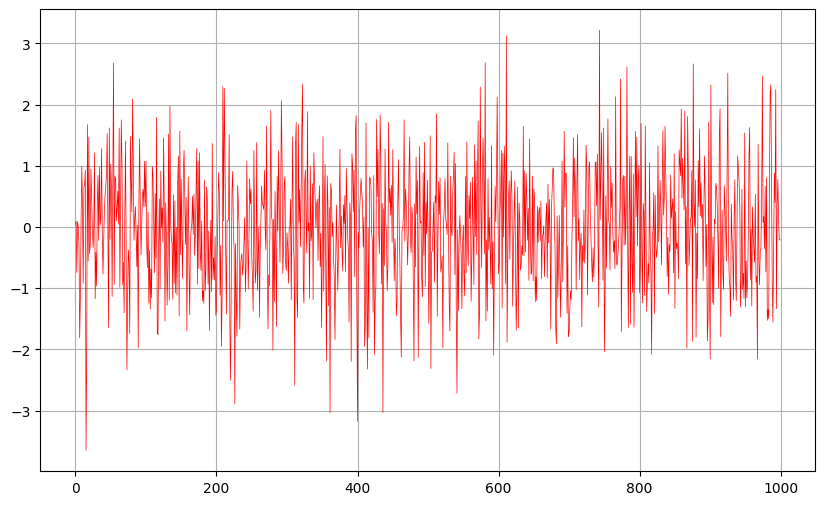

In [105]:
Mass = np.random.normal(0, 1, 10**3)
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(Mass, linewidth=0.5, c='red')

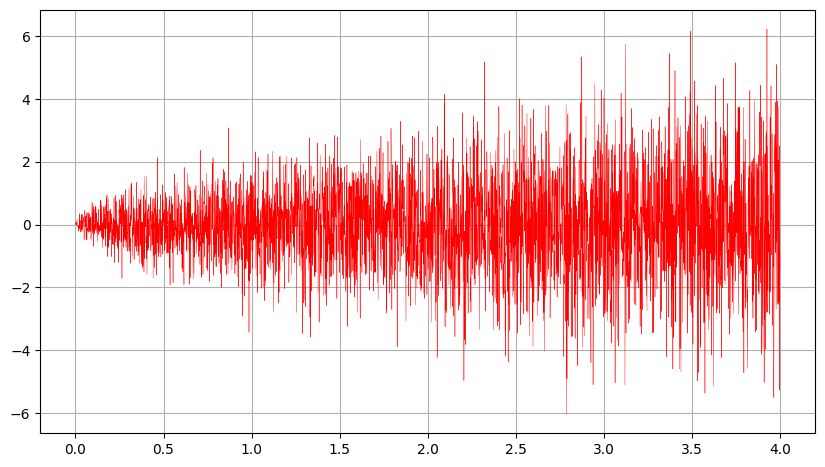

In [106]:
X,W,N,T = [i/1000 for i in range(4000)],[],1000,4
Delta = T/N
W = [(np.random.normal(0, 1, 1)*sqrt(X[i]))[0] for i in range(len(X))]
plt.figure(figsize=(10, 5.5))
plt.grid()
plt.plot(X, W, linewidth=0.3, c='red')

In [107]:

class Trapezoid:

    def trapezoid(self, f, a, b, epsilon):
        eps=epsilon
        count=0
        while eps%10!=0:
            count+=1
            eps*=10
        m = self.find_n(f, a, b, epsilon)
        X = np.arange(a, b + (b - a) / m, (b - a) /m)
        # print(X)
        s = 0
        for i in range(len(X)):
            if (i == 0) or (i == len(X) - 1):
                s += (b - a) / (2 * m) * (self.f(X[i]))
            else:
                s += 2 * (b - a) / (2 * m) * (self.f(X[i]))
        return s

    def dif_func(self, f, n):
        func = diff(f, x, n)
        return func

    def f(self, x):
        return 0.05*x-(x**2-3*x)**2/(2*100*100)

    def max(self, f, a, b):
        X = np.arange(a, b, 0.0001)
        Max_f = self.f(a)
        for i in X:
            if self.f(i) > Max_f:
                Max_f = self.f(i)
        return Max_f

    def find_n(self, f, a, b, epsilon):
        m = symbols('m', real=True)
        n = max(solve((b - a) ** 3 * self.max(self.dif_func(f, 2), a, b) / (12 * m ** 2) - epsilon**2, m))
        # print(n)
        if int(n) < n:
            n = int(n)
            n += 1
        else:
            n = int(n)
        return n

class Monte_Karlo:
    def find_n(self,epsilon,delta):
        return int(1/(4*epsilon**2*delta))+1


    def monte_carlo(self,t,n):
        n=int(n)
        ravn = np.random.uniform(0,t,n)
        s=math.sqrt(t)* np.random.normal(0, 1, 1)/n*np.sum(np.absolute(ravn*ravn - 3*ravn)/100)
        return s

In [108]:
x = symbols('x')
f = 0.05*x-(x**2-3*x)**2/(2*100*100)

T = Trapezoid()
MK=Monte_Karlo()

times = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
Trap=[]
for t in times:
    Trap+=[T.trapezoid(f,0,t,0.01)]

Mont=[]
N=MK.find_n(0.01,0.05)
for j in range(1,9):
    Nj=j/8*N
    Mont+=[MK.monte_carlo(times[j-1],Nj)[0]]

print('Метод трапеций:',np.around(np.array(Trap),4))
print('Количество итераций метода трапеций:',T.find_n(f,0,4,0.01))
print("Метод Монте-Карло: ",np.around(np.array(Mont),4))
print('Количество итераций метода Монте-Каро:',MK.find_n(0.01,0.05))
S=[]
for i in range(len(Mont)):
    S+=[20*math.exp(Trap[i]+Mont[i])]

print('Цена БА:',np.around(np.array(S),4))

Метод трапеций: [0.0062 0.0249 0.056  0.0997 0.1559 0.2246 0.3135 0.3994]
Количество итераций метода трапеций: 104
Метод Монте-Карло:  [ 0.0073 -0.0021  0.0079  0.0026 -0.0207  0.0081  0.0095  0.004 ]
Количество итераций метода Монте-Каро: 50000
Цена БА: [20.2731 20.4614 21.3216 22.1529 22.8954 25.2405 27.6266 29.9381]


Облигация [20.1251 20.5046 21.153  22.0963 23.3732 25.0363 27.3646 29.8174]
Количество итераций метода трапеций: 104


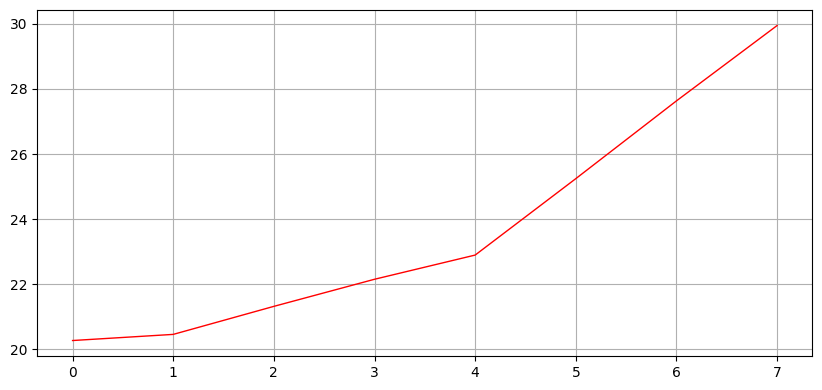

In [109]:
NewTrap=[]
f = 0.05*x
for t in times:
    NewTrap+=[20*math.exp(T.trapezoid(f,0,t,0.01))]
print("Облигация",np.around(np.array(NewTrap),4))
print('Количество итераций метода трапеций:',T.find_n(f,0,4,0.01))

plt.figure(figsize=(10, 4.5))
plt.grid()
plt.plot(S, color="red",linewidth = 1)

In [110]:

def func(x,St):
    res = 0.05*St*x+abs(t*t-3*t)/100*St*math.sqrt(x)*np.random.normal(0, 1, 1)[0]
    return res
    
N=1000
h=4/N
Rk_X=[20]
T=[0]
for i in range(N):
  k1X=h*(func(T[i],Rk_X[i]))
  k2X=h*(func(T[i],Rk_X[i]+k1X/2))
  k3X=h*(func(T[i],Rk_X[i]+k2X/2))
  k4X=h*(func(T[i],Rk_X[i]+k3X))
  Rk_X+=[Rk_X[i]+(k1X+2*k2X+2*k3X+k4X)/6]
  T+=[T[i]+h]


In [111]:
k=0
T=np.round(T,4)
Ba=[]
Rk=[]
for i in range(len(T)):
    if(T[i] in times):
        Ba+=[round(S[k],4)]
        Rk+=[round(Rk_X[i],4)]
        k+=1
res = pd.DataFrame({'Базовый актив':Ba, "Рунге-Кутты" : Rk})
res


,Базовый актив,Рунге-Кутты
0,20.2731,20.1091
1,20.4614,20.4603
2,21.3216,21.0719
3,22.1529,21.9509
4,22.8954,23.2594
5,25.2405,24.9090
6,27.6266,27.0353
7,29.9381,29.8163
